/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

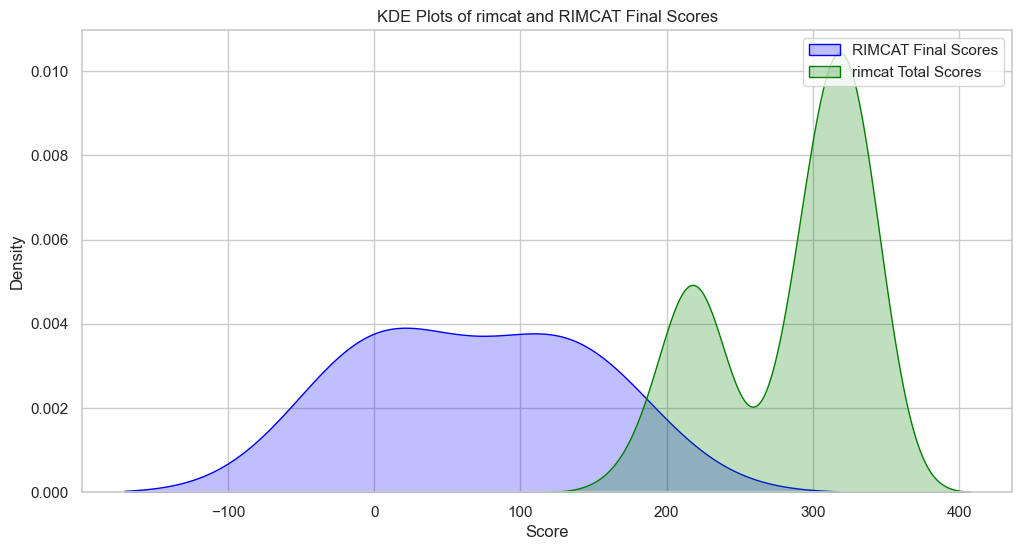

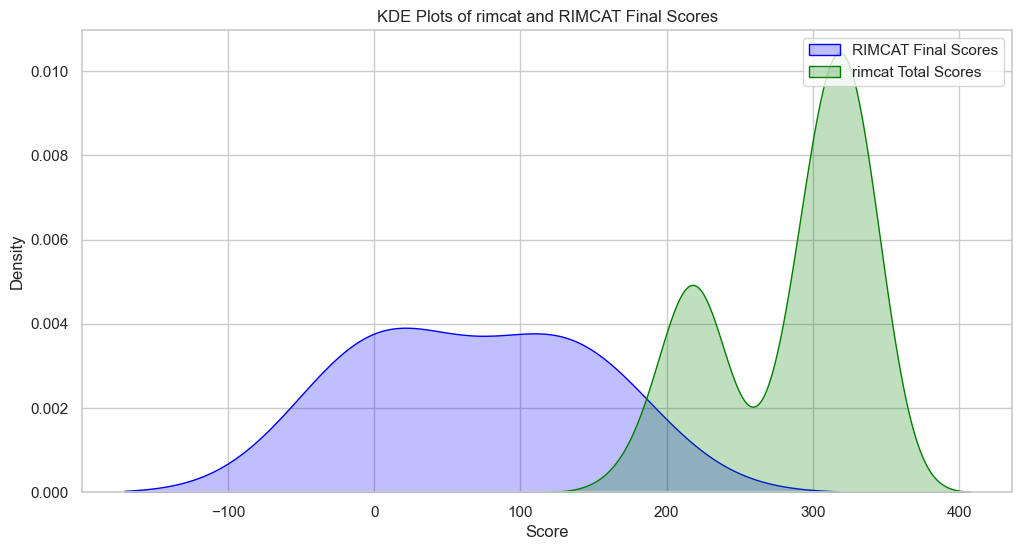

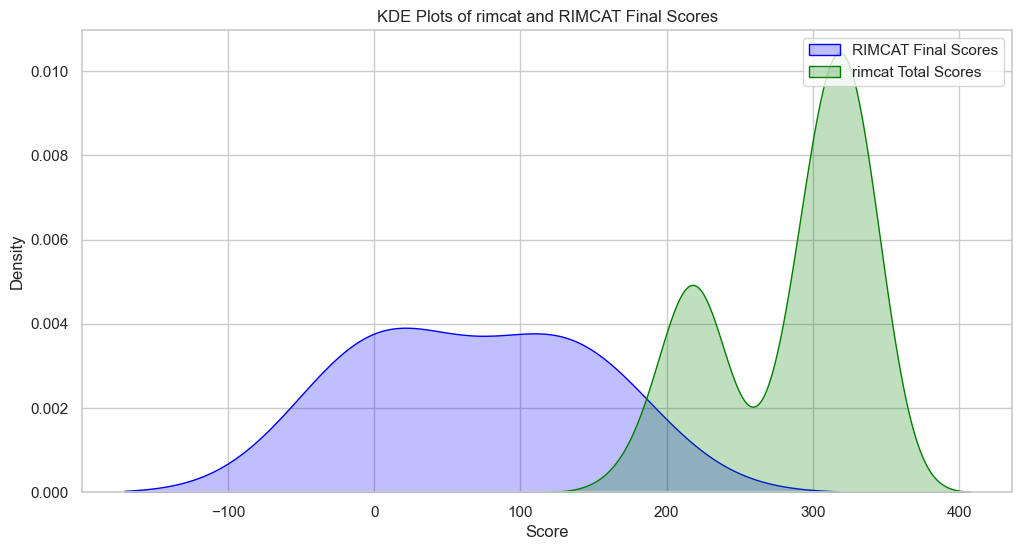

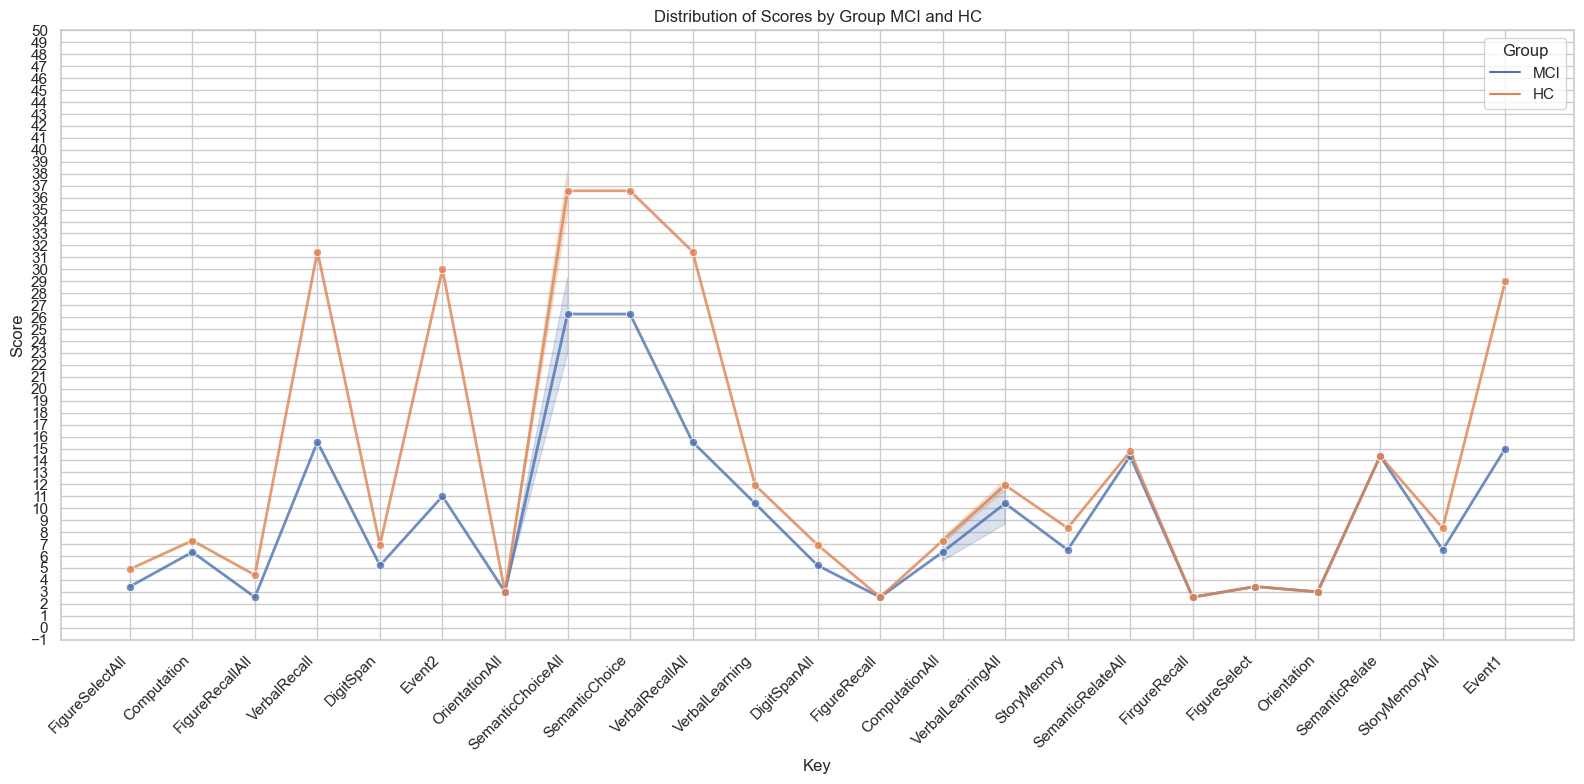

In [114]:
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Directory containing the JSON files
json_directory = '/Users/sanjanamortha/Desktop/Desktop/Ecowear/Data_analysis/summaries_groups'

# List of keys to extract
keys_to_extract = [
    'FigureSelectAll',
    'Computation',
    'FigureRecallAll',
    'VerbalRecall',
    'DigitSpan',
    'Event2',
    'OrientationAll',
    'SemanticChoiceAll',
    'SemanticChoice',
    'VerbalRecallAll',
    'VerbalLearning',
    'DigitSpanAll',
    'FigureRecall',
    'ComputationAll',
    'VerbalLearningAll',
    'StoryMemory',
    'SemanticRelateAll',
    'FirgureRecall',  # Typo corrected to 'FigureRecall'
    'FigureSelect',
    'Orientation',
    'SemanticRelate',
    'StoryMemoryAll',
    'Event1'
]

# List to store scores and group IDs
data = []

# Function to read and extract specified keys and id from JSON files
def extract_data(file_path):
    with open(file_path, 'r') as file:
        try:
            data = json.load(file)
            id = data.get('id')
            extracted_data = {}
            for key in keys_to_extract:
                if key in data:
                    score = data[key]
                    if isinstance(score, list):
                        # Handle infinite values
                        score = [np.nan if np.isinf(s) else s for s in score]
                    else:
                        score = np.nan if np.isinf(score) else score
                    extracted_data[key] = score
                elif f"{key}All" in data:
                    score_all = data[f"{key}All"]
                    if isinstance(score_all, list):
                        # Handle infinite values
                        score_all = [np.nan if np.isinf(s) else s for s in score_all]
                    else:
                        score_all = np.nan if np.isinf(score_all) else score_all
                    extracted_data[key] = score_all
            if extracted_data:
                return extracted_data, id
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON from {os.path.basename(file_path)}: {e}")
    return None

# Iterate over each file in the directory
for filename in os.listdir(json_directory):
    if filename.endswith('.json'):
        file_path = os.path.join(json_directory, filename)
        result = extract_data(file_path)
        if result is not None:
            extracted_data, group_id = result
            for key, score in extracted_data.items():
                if isinstance(score, list):
                    for s in score:
                        data.append((key, s, group_id))
                else:
                    data.append((key, score, group_id))

# Convert to DataFrame for easy plotting
df = pd.DataFrame(data, columns=['Key', 'Score', 'Group'])

# Plot the data using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))

# Create a line plot to show the distribution of scores by key and group
sns.lineplot(x='Key', y='Score', hue='Group', data=df, marker='o', linewidth=2, alpha=0.8)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust y-axis ticks at 1-unit intervals
plt.yticks(np.arange(np.floor(df['Score'].min()) - 1, np.ceil(df['Score'].max()) + 2, 1))

# Set plot title and labels
plt.title('Distribution of Scores by Group MCI and HC')
plt.xlabel('Key')
plt.ylabel('Score')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


Person 1 total score IN MCI: 173.21604938271605
Person 2 total score IN MCI: 228.21604938271608
Person 3 total score IN MCI: 214.21604938271608
Person 4 total score IN MCI: 221.21604938271608
Person 5 total score IN MCI: 224.21604938271608
Person 6 total score IN MCI: 217.0493827160494
Person 7 total score IN MCI: 220.21604938271605
Person 8 total score IN MCI: 221.21604938271608
Person 9 total score IN MCI: 203.21604938271605
Person 10 total score IN MCI: 199.21604938271608
Person 11 total score IN MCI: 225.21604938271608
Person 12 total score IN MCI: 237.21604938271608
Person 13 total score IN MCI: 249.21604938271608
Person 14 total score IN MCI: 202.21604938271605
Person 15 total score IN MCI: 196.21604938271605
Person 16 total score IN MCI: 211.21604938271605
Person 17 total score IN MCI: 216.21604938271608
Person 18 total score IN MCI: 234.21604938271608
Person 19 total score IN MCI: 233.21604938271608
Person 20 total score IN MCI: 217.21604938271608
Person 21 total score IN MCI: 

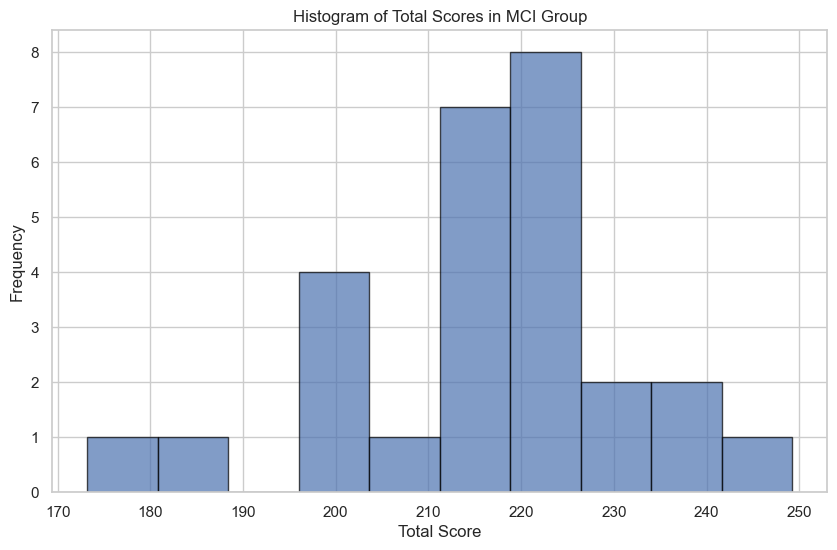

In [88]:
import json

# Load the MCI JSON data for total scores for each person
with open('/Users/sanjanamortha/Desktop/Desktop/Ecowear/Data_analysis/summaries_groups/MCI.json', 'r') as file:
    data = json.load(file)

# Determine the number of persons based on the length of one of the list values
num_persons = len(data["FigureSelectAll"])

# Initialize total scores for each person
total_scores = [0] * num_persons

# Sum up the values for each person's score
for key, value in data.items():
    if isinstance(value, list):
        for i in range(num_persons):
            total_scores[i] += value[i]
    elif isinstance(value, (int, float)):
        for i in range(num_persons):
            total_scores[i] += value

# Print total scores for each person
for i, score in enumerate(total_scores, 1):
    print(f"Person {i} total score IN MCI: {score}")

# Calculate the overall total score
overall_total_score = sum(total_scores)
print(f"Overall total score: {overall_total_score}")

# Plotting the histogram for the scores
plt.figure(figsize=(10, 6))
plt.hist(total_scores, bins='auto', edgecolor='black', alpha=0.7)
plt.title('Histogram of Total Scores in MCI Group')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Person 1 total score IN HC: 296.4996964177292
Person 2 total score IN HC: 304.4996964177292
Person 3 total score IN HC: 333.49969641772924
Person 4 total score IN HC: 331.49969641772924
Person 5 total score IN HC: 293.4996964177292
Person 6 total score IN HC: 308.49969641772924
Person 7 total score IN HC: 315.49969641772924
Person 8 total score IN HC: 337.49969641772924
Person 9 total score IN HC: 322.49969641772924
Person 10 total score IN HC: 337.49969641772924
Person 11 total score IN HC: 299.4996964177292
Person 12 total score IN HC: 318.49969641772924
Person 13 total score IN HC: 314.49969641772924
Person 14 total score IN HC: 346.49969641772924
Person 15 total score IN HC: 332.49969641772924
Person 16 total score IN HC: 326.49969641772924
Person 17 total score IN HC: 328.49969641772924
Person 18 total score IN HC: 294.4996964177292
Person 19 total score IN HC: 321.49969641772924
Person 20 total score IN HC: 301.4996964177292
Person 21 total score IN HC: 317.49969641772924
Person 

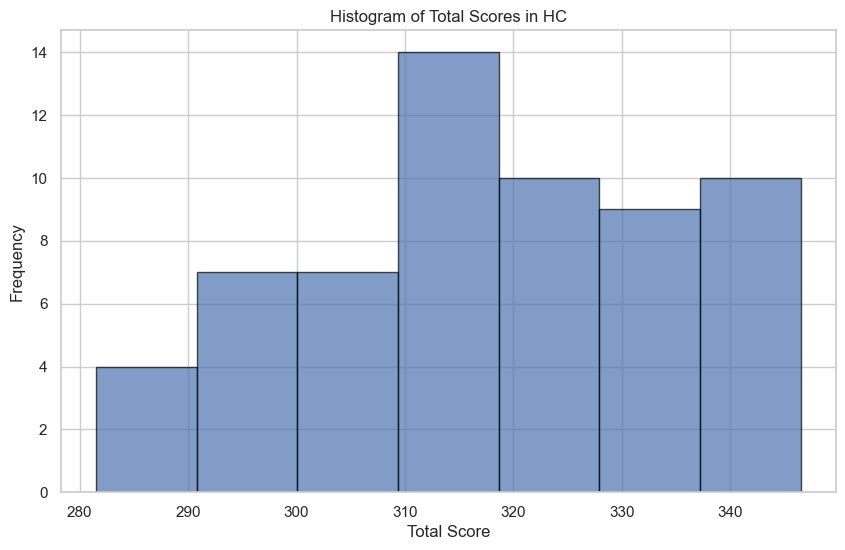

In [86]:
import json

# Load the HC JSON data for total scores for each person
with open('/Users/sanjanamortha/Desktop/Desktop/Ecowear/Data_analysis/summaries_groups/HC.json', 'r') as file:
    data = json.load(file)

# Determine the number of persons based on the length of one of the list values
num_persons = len(data["FigureSelectAll"])

# Initialize total scores for each person
total_scores = [0] * num_persons

# Sum up the values for each person's score
for key, value in data.items():
    if isinstance(value, list):
        for i in range(num_persons):
            total_scores[i] += value[i]
    elif isinstance(value, (int, float)):
        for i in range(num_persons):
            total_scores[i] += value

# Print total scores for each person
for i, score in enumerate(total_scores, 1):
    print(f"Person {i} total score IN HC: {score}")

# Calculate the overall total score
overall_total_score = sum(total_scores)
print(f"Overall total score: {overall_total_score}")

# Plotting the histogram for the scores
plt.figure(figsize=(10, 6))
plt.hist(total_scores, bins='auto', edgecolor='black', alpha=0.7)
plt.title('Histogram of Total Scores in HC')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [82]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to calculate total scores from a JSON file
def calculate_total_scores(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)

    # Determine the number of persons based on the length of one of the list values
    num_persons = len(data["FigureSelectAll"])

    # Initialize total scores for each person
    total_scores = [0] * num_persons

    # Sum up the values for each person's score
    for key, value in data.items():
        if isinstance(value, list):
            for i in range(num_persons):
                total_scores[i] += value[i]
        elif isinstance(value, (int, float)):
            for i in range(num_persons):
                total_scores[i] += value

    return total_scores


Person 1 total score IN HC: 296.49969641772924
Person 2 total score IN HC: 304.49969641772924
Person 3 total score IN HC: 333.49969641772924
Person 4 total score IN HC: 331.49969641772924
Person 5 total score IN HC: 293.49969641772924
Person 6 total score IN HC: 308.49969641772924
Person 7 total score IN HC: 315.49969641772924
Person 8 total score IN HC: 337.49969641772924
Person 9 total score IN HC: 322.49969641772924
Person 10 total score IN HC: 337.49969641772924
Person 11 total score IN HC: 299.49969641772924
Person 12 total score IN HC: 318.4996964177293
Person 13 total score IN HC: 314.49969641772924
Person 14 total score IN HC: 346.49969641772924
Person 15 total score IN HC: 332.49969641772924
Person 16 total score IN HC: 326.49969641772924
Person 17 total score IN HC: 328.49969641772924
Person 18 total score IN HC: 294.49969641772924
Person 19 total score IN HC: 321.49969641772924
Person 20 total score IN HC: 301.49969641772924
Person 21 total score IN HC: 317.4996964177293
Per

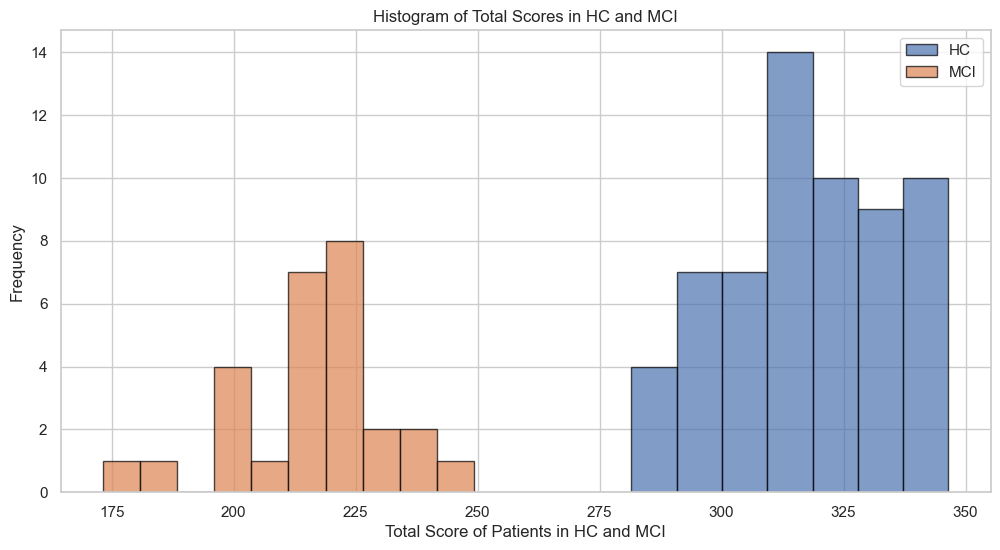

In [103]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to calculate total scores from a JSON file
def calculate_total_scores(data):
    keys_to_sum = [
        "FigureSelectAll", "FigureRecallAll", "VerbalRecallAll", "DigitSpanAll",
        "OrientationAll", "SemanticChoiceAll", "VerbalLearningAll", "ComputationAll",
        "StoryMemoryAll", "SemanticRelateAll"
    ]
    
    # Find the number of persons (based on the length of the first key)
    num_persons = len(data[keys_to_sum[0]])
    
    # Initialize total scores list for all persons
    total_scores = [0] * num_persons
    
    # Sum up the scores for each person across the specified keys
    for key in keys_to_sum:
        if key in data and isinstance(data[key], list):
            for i in range(num_persons):
                total_scores[i] += data[key][i]
    
    # Sum up non-list scores for each person
    for key, value in data.items():
        if key not in keys_to_sum and isinstance(value, (int, float)):
            for i in range(num_persons):
                total_scores[i] += value
    
    return total_scores


# Main function to process both JSON files and calculate total scores
def main():
    json_files = [
        '/Users/sanjanamortha/Desktop/Desktop/Ecowear/Data_analysis/summaries_groups/HC.json',
        '/Users/sanjanamortha/Desktop/Desktop/Ecowear/Data_analysis/summaries_groups/MCI.json'
    ]

    overall_total_score = 0
    all_total_scores = []

    labels = ["HC", "MCI"]

    for idx, json_file in enumerate(json_files, 1):
        with open(json_file, 'r') as f:
            data = json.load(f)
        total_scores = calculate_total_scores(data)
        all_total_scores.append(total_scores)
        overall_total_score += sum(total_scores)

        # Determine the label based on the index
        label = labels[idx - 1]

        # Print total scores for each person
        for i, score in enumerate(total_scores, 1):
            print(f"Person {i} total score IN {label}: {score}")

    # Print overall total score
    print(f"Overall total score: {overall_total_score}")

    # Plotting the histograms for HC and MCI
    plt.figure(figsize=(12, 6))

    for i, (total_scores, label) in enumerate(zip(all_total_scores, labels)):
        plt.hist(total_scores, bins='auto', alpha=0.7, label=label, edgecolor='black')

    plt.title('Histogram of Total Scores in HC and MCI')
    plt.xlabel('Total Score of Patients in HC and MCI')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

    # Return the scores and labels for use in another cell
    return all_total_scores, labels

if __name__ == "__main__":
    # Capture the returned values
    all_total_scores, labels = main()


/var/folders/63/_r02dhj94mg0djcj7skr0y2r0000gn/T/ipykernel_54216/1067761314.py:15: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Group', y='Total Score', data=df, jitter=True, palette="Set2", size=8, alpha=0.7)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. P

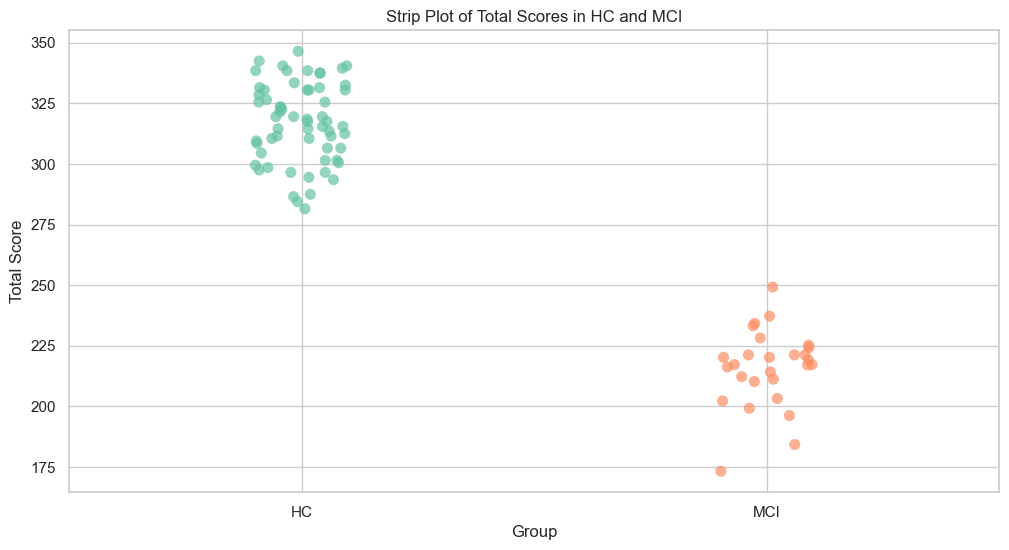

In [73]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Combine all the scores into a single DataFrame for plotting
all_data = []
for scores, label in zip(all_total_scores, labels):
    for score in scores:
        all_data.append({'Group': label, 'Total Score': score})

df = pd.DataFrame(all_data)

# Plotting the strip plot
plt.figure(figsize=(12, 6))
sns.stripplot(x='Group', y='Total Score', data=df, jitter=True, palette="Set2", size=8, alpha=0.7)
plt.title('Strip Plot of Total Scores in HC and MCI')
plt.xlabel('Group')
plt.ylabel('Total Score')
plt.grid(True)
plt.show()


Person 1 total score IN HC: 296.4996964177292
Person 2 total score IN HC: 304.4996964177292
Person 3 total score IN HC: 333.49969641772924
Person 4 total score IN HC: 331.49969641772924
Person 5 total score IN HC: 293.4996964177292
Person 6 total score IN HC: 308.49969641772924
Person 7 total score IN HC: 315.49969641772924
Person 8 total score IN HC: 337.49969641772924
Person 9 total score IN HC: 322.49969641772924
Person 10 total score IN HC: 337.49969641772924
Person 11 total score IN HC: 299.4996964177292
Person 12 total score IN HC: 318.49969641772924
Person 13 total score IN HC: 314.49969641772924
Person 14 total score IN HC: 346.49969641772924
Person 15 total score IN HC: 332.49969641772924
Person 16 total score IN HC: 326.49969641772924
Person 17 total score IN HC: 328.49969641772924
Person 18 total score IN HC: 294.4996964177292
Person 19 total score IN HC: 321.49969641772924
Person 20 total score IN HC: 301.4996964177292
Person 21 total score IN HC: 317.49969641772924
Person 

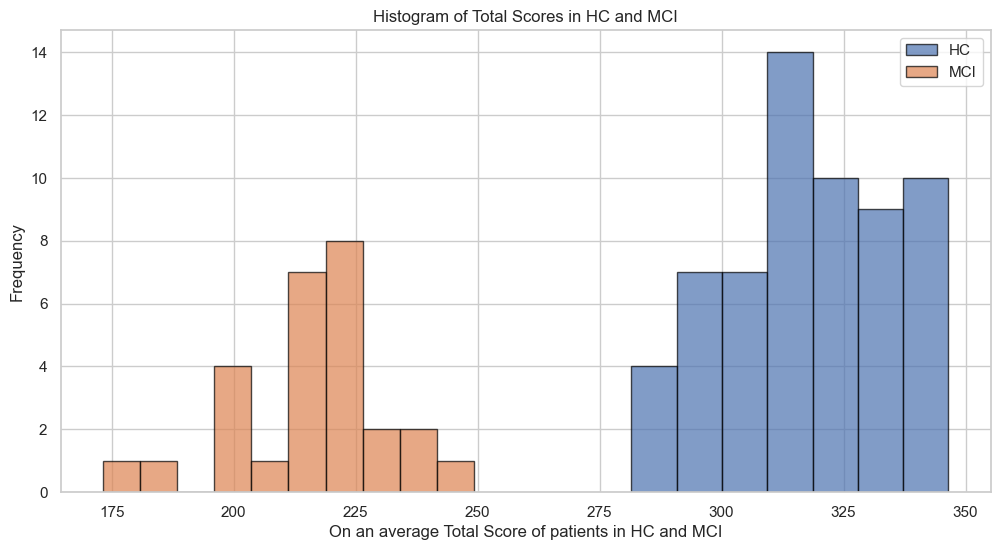

In [74]:
# Main function to process both JSON files and calculate total scores
def main():
    json_files = [
        '/Users/sanjanamortha/Desktop/Desktop/Ecowear/Data_analysis/summaries_groups/HC.json',
        '/Users/sanjanamortha/Desktop/Desktop/Ecowear/Data_analysis/summaries_groups/MCI.json'
    ]

    overall_total_score = 0
    all_total_scores = []

    labels = ["HC", "MCI"]

    for idx, json_file in enumerate(json_files, 1):
        total_scores = calculate_total_scores(json_file)
        all_total_scores.append(total_scores)
        overall_total_score += sum(total_scores)

        # Determine the label based on the index
        label = labels[idx - 1]

        # Print total scores for each person
        for i, score in enumerate(total_scores, 1):
            print(f"Person {i} total score IN {label}: {score}")

    # Print overall total score
    print(f"Overall total score: {overall_total_score}")

    # Plotting the histograms for HC and MCI
    plt.figure(figsize=(12, 6))

    for i, (total_scores, label) in enumerate(zip(all_total_scores, labels)):
        plt.hist(total_scores, bins='auto', alpha=0.7, label=label, edgecolor='black')

    plt.title('Histogram of Total Scores in HC and MCI')
    plt.xlabel('On an average Total Score of patients in HC and MCI')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

Total scores from HC.json: [296.49969641772924, 304.49969641772924, 333.49969641772924, 331.49969641772924, 293.49969641772924, 308.49969641772924, 315.49969641772924, 337.49969641772924, 322.49969641772924, 337.49969641772924, 299.49969641772924, 318.4996964177293, 314.49969641772924, 346.49969641772924, 332.49969641772924, 326.49969641772924, 328.49969641772924, 294.49969641772924, 321.49969641772924, 301.49969641772924, 317.4996964177293, 319.49969641772924, 311.49969641772924, 330.49969641772924, 342.49969641772924, 338.49969641772924, 319.49969641772924, 312.49969641772924, 298.49969641772924, 281.49969641772924, 330.49969641772924, 287.49969641772924, 330.49969641772924, 339.49969641772924, 323.49969641772924, 323.49969641772924, 317.4996964177293, 296.49969641772924, 306.49969641772924, 284.49969641772924, 310.49969641772924, 340.49969641772924, 309.49969641772924, 325.49969641772924, 325.49969641772924, 306.49969641772924, 331.49969641772924, 338.49969641772924, 286.49969641772

/var/folders/63/_r02dhj94mg0djcj7skr0y2r0000gn/T/ipykernel_54216/3605229184.py:62: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(all_total_scores[0], shade=True, label='HC Total Scores', color='blue')
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/63/_r02dhj94mg0djcj7skr0y2r0000gn/T/ipykernel_54216/3605229184.py:66: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(all_total_scores[1], shade=True, label='MCI Total Scores', color='green')
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarni

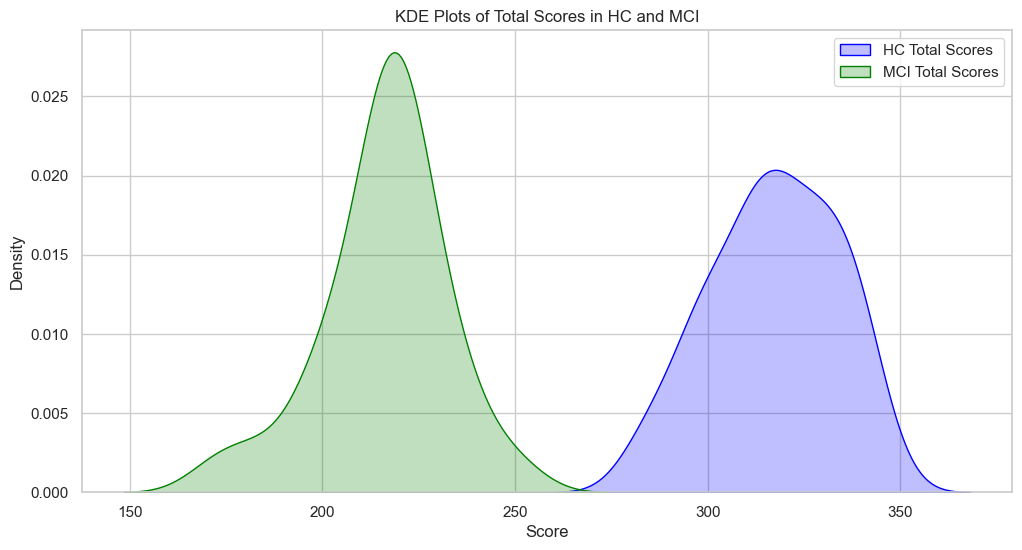

In [100]:
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate total scores for each person in a JSON file
def calculate_total_scores(data):
    keys_to_sum = [
        "FigureSelectAll", "FigureRecallAll", "VerbalRecallAll", "DigitSpanAll",
        "OrientationAll", "SemanticChoiceAll", "VerbalLearningAll", "ComputationAll",
        "StoryMemoryAll", "SemanticRelateAll"
    ]
    
    # Find the number of persons (based on the length of the first key)
    num_persons = len(data[keys_to_sum[0]])
    
    # Initialize total scores list for all persons
    total_scores = [0] * num_persons
    
    # Sum up the scores for each person across the specified keys
    for key in keys_to_sum:
        if key in data and isinstance(data[key], list):
            for i in range(num_persons):
                total_scores[i] += data[key][i]
    
    # Sum up non-list scores for each person
    for key, value in data.items():
        if key not in keys_to_sum and isinstance(value, (int, float)):
            for i in range(num_persons):
                total_scores[i] += value
    
    return total_scores

# Main function to process both JSON files and calculate total scores
def main():
    json_files = [
        '/Users/sanjanamortha/Desktop/Desktop/Ecowear/Data_analysis/summaries_groups/HC.json',
        '/Users/sanjanamortha/Desktop/Desktop/Ecowear/Data_analysis/summaries_groups/MCI.json'
    ]

    all_total_scores = []
    labels = ["HC", "MCI"]

    for idx, json_file in enumerate(json_files):
        with open(json_file, 'r') as f:
            data = json.load(f)
        total_scores = calculate_total_scores(data)
        if total_scores:
            print(f"Total scores from {os.path.basename(json_file)}: {total_scores}")
        all_total_scores.append(total_scores)

    # Print the total scores to debug
    print(f"HC total scores: {all_total_scores[0]}")
    print(f"MCI total scores: {all_total_scores[1]}")

    # Plot KDE plots for HC and MCI total scores in a single figure
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))

    # KDE plot for HC total scores
    if all_total_scores[0]:
        sns.kdeplot(all_total_scores[0], shade=True, label='HC Total Scores', color='blue')

    # KDE plot for MCI total scores
    if all_total_scores[1]:
        sns.kdeplot(all_total_scores[1], shade=True, label='MCI Total Scores', color='green')

    plt.title('KDE Plots of Total Scores in HC and MCI')
    plt.xlabel('Score')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Person 1 total score IN HC: 109
Person 2 total score IN HC: 117
Person 3 total score IN HC: 146
Person 4 total score IN HC: 144
Person 5 total score IN HC: 106
Person 6 total score IN HC: 121
Person 7 total score IN HC: 128
Person 8 total score IN HC: 150
Person 9 total score IN HC: 135
Person 10 total score IN HC: 150
Person 11 total score IN HC: 112
Person 12 total score IN HC: 131
Person 13 total score IN HC: 127
Person 14 total score IN HC: 159
Person 15 total score IN HC: 145
Person 16 total score IN HC: 139
Person 17 total score IN HC: 141
Person 18 total score IN HC: 107
Person 19 total score IN HC: 134
Person 20 total score IN HC: 114
Person 21 total score IN HC: 130
Person 22 total score IN HC: 132
Person 23 total score IN HC: 124
Person 24 total score IN HC: 143
Person 25 total score IN HC: 155
Person 26 total score IN HC: 151
Person 27 total score IN HC: 132
Person 28 total score IN HC: 125
Person 29 total score IN HC: 111
Person 30 total score IN HC: 94
Person 31 total scor

/var/folders/63/_r02dhj94mg0djcj7skr0y2r0000gn/T/ipykernel_54216/2121964788.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(total_scores, label=label, shade=True)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/63/_r02dhj94mg0djcj7skr0y2r0000gn/T/ipykernel_54216/2121964788.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(total_scores, label=label, shade=True)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a futu

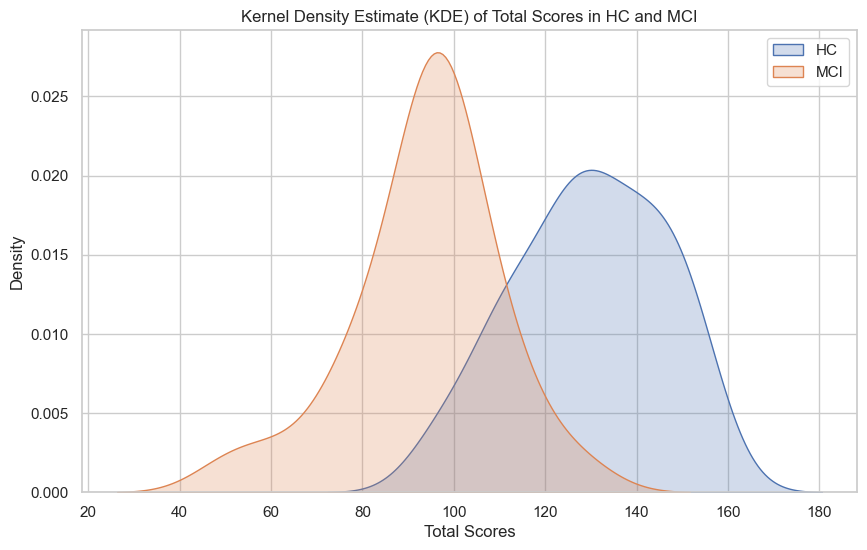

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Main function to process both JSON files and calculate total scores
def main():
    json_files = [
        '/Users/sanjanamortha/Desktop/Desktop/Ecowear/Data_analysis/summaries_groups/HC.json',
        '/Users/sanjanamortha/Desktop/Desktop/Ecowear/Data_analysis/summaries_groups/MCI.json'
    ]

    overall_total_score = 0
    all_total_scores = []

    labels = ["HC", "MCI"]

    for idx, json_file in enumerate(json_files, 1):
        total_scores = calculate_total_scores(json_file)
        all_total_scores.append(total_scores)
        overall_total_score += sum(total_scores)

        # Determine the label based on the index
        label = labels[idx - 1]

        # Print total scores for each person
        for i, score in enumerate(total_scores, 1):
            print(f"Person {i} total score IN {label}: {score}")

    # Print overall total score
    print(f"Overall total score: {overall_total_score}")

    # Plotting the KDE plots for HC and MCI
    plt.figure(figsize=(10, 6))

    for total_scores, label in zip(all_total_scores, labels):
        sns.kdeplot(total_scores, label=label, shade=True)

    plt.title('Kernel Density Estimate (KDE) of Total Scores in HC and MCI')
    plt.xlabel('Total Scores')
    plt.ylabel('Density')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


In [113]:
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st

# Directories containing the JSON files
RIMCAT_json_directory = '/Users/sanjanamortha/Desktop/Desktop/Ecowear/Data_analysis/scores_2024604'
rimcat_json_files = [
    '/Users/sanjanamortha/Desktop/Desktop/Ecowear/Data_analysis/summaries_groups/HC.json',
    '/Users/sanjanamortha/Desktop/Desktop/Ecowear/Data_analysis/summaries_groups/MCI.json'
]

# Function to read and extract finalScore from JSON files in rimcat
def extract_rimcat_final_score(file_path):
    with open(file_path, 'r') as file:
        try:
            data = json.load(file)
            if 'finalScore' in data:
                return data['finalScore']
        except json.JSONDecodeError as e:
            st.error(f"Error decoding JSON from {os.path.basename(file_path)}: {e}")
    return None

# Function to calculate total scores for each person in a JSON file
def calculate_rimcat_total_scores(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    keys_to_sum = [
        "FigureSelectAll", "FigureRecallAll", "VerbalRecallAll", "DigitSpanAll",
        "OrientationAll", "SemanticChoiceAll", "VerbalLearningAll", "ComputationAll",
        "StoryMemoryAll", "SemanticRelateAll"
    ]
    
    # Find the number of persons (based on the length of the first key)
    num_persons = len(data[keys_to_sum[0]])
    
    # Initialize total scores list for all persons
    total_scores = [0] * num_persons
    
    # Sum up the scores for each person across the specified keys
    for key in keys_to_sum:
        if key in data and isinstance(data[key], list):
            for i in range(num_persons):
                total_scores[i] += data[key][i]
    
    # Sum up non-list scores for each person
    for key, value in data.items():
        if key not in keys_to_sum and isinstance(value, (int, float)):
            for i in range(num_persons):
                total_scores[i] += value
    
    return total_scores

# Streamlit UI
def main():
    st.title('KDE Plots of rimcat and RIMCAT Final Scores')
    page = st.sidebar.selectbox("Select a page", ['RIMCAT and rimcat Analysis'])

    if page == 'RIMCAT and rimcat Analysis':
        # Directories and files
        RIMCAT_final_scores = []
        for filename in os.listdir(RIMCAT_json_directory):
            if filename.endswith('.json'):
                file_path = os.path.join(RIMCAT_json_directory, filename)
                final_score = extract_rimcat_final_score(file_path)
                if final_score is not None:
                    RIMCAT_final_scores.append(final_score)
        
        all_total_scores = []
        labels = ["HC", "MCI"]
        
        for json_file in rimcat_json_files:
            try:
                total_scores = calculate_rimcat_total_scores(json_file)
                if total_scores:
                    st.write(f"Total scores from {os.path.basename(json_file)}: {total_scores}")
                all_total_scores.append(total_scores)
            except FileNotFoundError:
                st.error(f"File {json_file} not found.")
            except json.JSONDecodeError as e:
                st.error(f"Error decoding JSON in {json_file}: {e}")
        
        # Combine all total scores for KDE plot
        rimcat_total_scores = all_total_scores[0] + all_total_scores[1]
        
        # Plotting KDE plots with Seaborn and Matplotlib
        sns.set(style="whitegrid")
        fig, ax = plt.subplots(figsize=(12, 6))
        
        if RIMCAT_final_scores:
            sns.kdeplot(RIMCAT_final_scores, shade=True, label='RIMCAT Final Scores', color='blue', ax=ax)
        
        if rimcat_total_scores:
            sns.kdeplot(rimcat_total_scores, shade=True, label='rimcat Total Scores', color='green', ax=ax)
        
        ax.set_title('KDE Plots of rimcat and RIMCAT Final Scores')
        ax.set_xlabel('Score')
        ax.set_ylabel('Density')
        ax.legend()
        
        # Display plot in Streamlit
        st.pyplot(fig)

if __name__ == "__main__":
    main()


/var/folders/63/_r02dhj94mg0djcj7skr0y2r0000gn/T/ipykernel_54216/4202207507.py:93: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(RIMCAT_final_scores, shade=True, label='RIMCAT Final Scores', color='blue', ax=ax)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/63/_r02dhj94mg0djcj7skr0y2r0000gn/T/ipykernel_54216/4202207507.py:96: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rimcat_total_scores, shade=True, label='rimcat Total Scores', color='green', ax=ax)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore